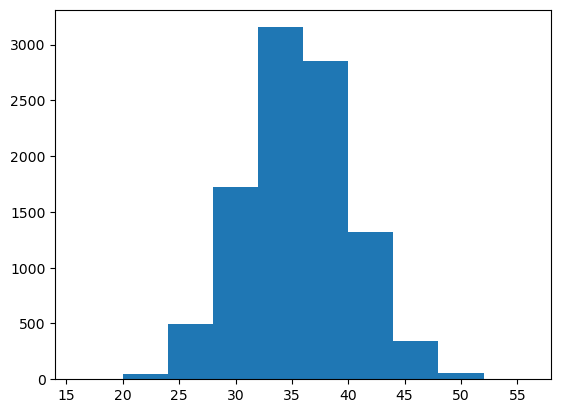

In [1]:
### Application 2: likelihood-based estimation using numpy
# the P of n_choose_k

# MLE estimator: Maximum Likelyhood Estimation
# using numpy an dscipy for MLE
import numpy as np
import matplotlib.pyplot as plt
k = 100
p = .35
n = 10000
x_i = np.random.binomial(n=k, p=p, size=n)
plt.hist(x_i)
plt.show()

In [5]:
### analytical solution
p_mle = (1./n) * np.sum(x_i/k)
p_mle

0.350517

In [4]:
### log-likelihood function

def neg_ll(theta: float, data: np.array, k: int) -> float:
    """ 
    
    """
    p_success = data * np.log(theta)
    p_failure = (k-data) * np.log(1-theta)

    return -np.sum(p_success + p_failure)

print(f'Log-Likelihood when we\'re far away: {-neg_ll(.8, x_i, k)}')
print(f'Log-Likelihood when we\'re close: {-neg_ll(.3, x_i, k)}')

Log-Likelihood when we're far away: -1123518.1718574397
Log-Likelihood when we're close: -653667.248068074


In [6]:
### Maximization
import scipy as sp

sp.optimize.minimize(
    fun=neg_ll, # the objective function
    x0=.25, # starting guess
    args=(x_i, k), # additional parameters passed to neg_ll
    bounds = ((0,1),), # bounds for the optimization
    method = 'Nelder-Mead' # optionally pick an algorithm
)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 647766.0950310641
             x: [ 3.505e-01]
           nit: 15
          nfev: 30
 final_simplex: (array([[ 3.505e-01],
                       [ 3.505e-01]]), array([ 6.478e+05,  6.478e+05]))

In [7]:
# use default solver (BFGS, I believe)
sp.optimize.minimize(
    fun=neg_ll, # the objective function
    x0=.25, # starting guess
    args=(x_i, k), # additional parameters passed to neg_ll
    bounds = ((0,1),) # bounds for the optimization
)


/var/folders/gz/0z81jqhd0kj0fqg5nl86x03w0000gn/T/ipykernel_7127/4274676848.py:8: RuntimeWarning: divide by zero encountered in log
  p_failure = (k-data) * np.log(1-theta)


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 672764.3560388606
        x: [ 2.500e-01]
      nit: 1
      jac: [-5.361e+05]
     nfev: 6
     njev: 3
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [ ]:
### Exercise: Markov Chain
# Generate 1000 draws from a Markov Chain that starts at zero
# with your choice of noise term. Set a seed for reproducibility.

In [12]:
# sol: Markov Chain (slower)
# why cannot run it? 
# %%time
rng = np.random.default_rng(seed = 481)

chain = []
x = 0

for i in range(1000):
    x += rng.standard_normal()
    chain.append(x)

In [13]:
# sol: Markov Chain (faster)
# %%time
rng = np.random.default_rng(seed = 481)

chain = np.cumsum(rng.standard_normal(size = 1000))

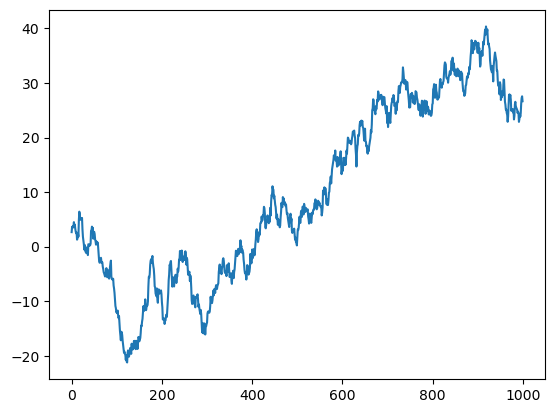

In [14]:
# Markov Chain Visualized
plt.plot(chain)

In [15]:
### Metropolis-Hastings Implementation
def met_hast(n_iterations: int) -> list:
    """
    Run Metropolis-Hastings algorithm for our binomial example.
    """
    post_draws = []
    theta_old = .5
    for i in range(n_iterations):
        theta_new = theta_old + np.random.normal(loc = 0, scale = .05)
        ll_old = -neg_ll(theta_old, x_i, k)
        ll_new = -neg_ll(theta_new, x_i, k)
        acceptance_rate = np.exp(ll_new-ll_old)
        if np.random.uniform() < acceptance_rate:
            post_draws.append(theta_new)
            theta_old = theta_new
        else:
            post_draws.append(theta_old)
    
    return post_draws

/var/folders/gz/0z81jqhd0kj0fqg5nl86x03w0000gn/T/ipykernel_7127/4250867917.py:12: RuntimeWarning: overflow encountered in exp
  acceptance_rate = np.exp(ll_new-ll_old)


Mean of posterior draws: 0.3506


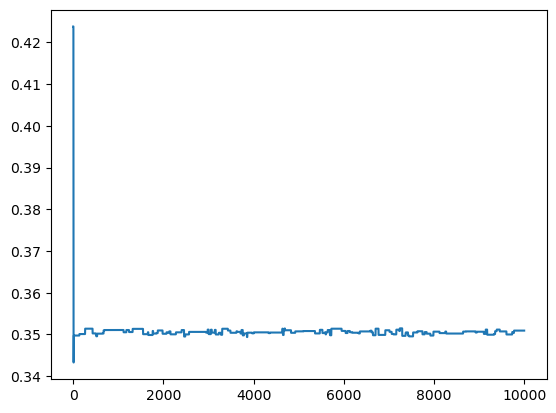

In [16]:
# Metropolis-Hastings Trace Plot# 
simulation_draws = met_hast(10000)
print(f'Mean of posterior draws: {round(np.mean(simulation_draws),4)}')
plt.plot(range(10000), simulation_draws)

Mean of posterior draws: 0.3505


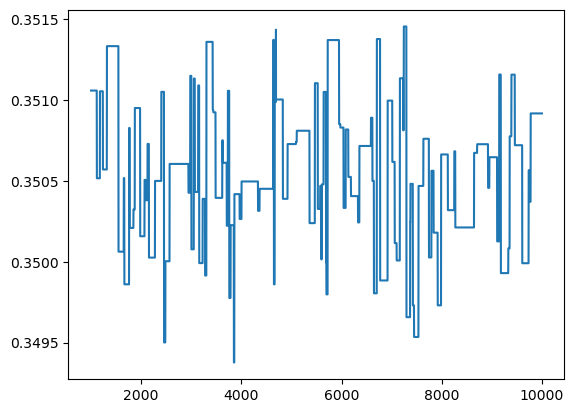

In [17]:
# above plot but remove burn-in
print(f'Mean of posterior draws: {round(np.mean(simulation_draws[1000:]),4)}')
plt.plot(range(1000,10000), simulation_draws[1000:])

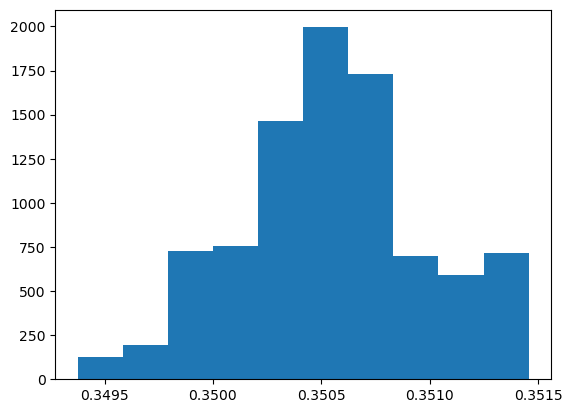

In [18]:
# Metropolis-Hasting Draws
plt.hist(simulation_draws[1000:])
plt.show()